## qflib Library Examples

In [44]:
import qflib as qf
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print("qflib version: {0}".format(qf.version()))
print("pid: {0}".format(os.getpid()))

qflib version: 0.8.0-debug
pid: 4996


In [45]:
name = "World"
print(qf.sayHello(name))

Hello World!


In [46]:
x = [1, 2, 3]
y = [4, 5]
op = qf.outerProd(x, y)
print(f'x: {x}\ny: {y}')
print(f'outerProd:\n{op}')

x: [1, 2, 3]
y: [4, 5]
outerProd:
[[ 4.  5.]
 [ 8. 10.]
 [12. 15.]]


In [47]:
# Matrix Echo
m = np.array([[1, 2, 3], [4, 5, 6]])
em = qf.echoMatrix(m)
print(f'orig matrix:\n{m}')
print(f'echo matrix:\n{em}')

orig matrix:
[[1 2 3]
 [4 5 6]]
echo matrix:
[[1. 2. 3.]
 [4. 5. 6.]]


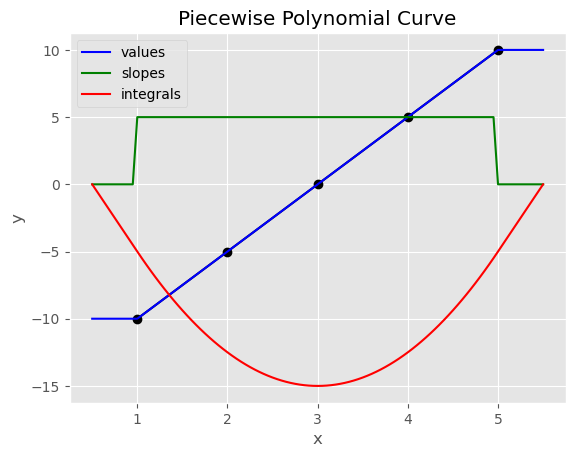

In [48]:
# Piecewise Polynomial Curves
xbpt = np.arange(1, 6)
yval =  np.arange(-10, 15, 5)
pord = 1
xval = np.arange(0.5, 5.55, 0.05)
pval = qf.ppolyEval(xbpt, yval, pord, xval, 0)
pder = qf.ppolyEval(xbpt, yval, pord, xval, 1)
pint = qf.ppolyIntegral(xbpt, yval, pord, xval[0], xval)

# plot
plt.plot(xbpt, yval, color='black', marker='o')
plt.plot(xval, pval, color='blue', label="values")
plt.plot(xval, pder, color='green', label="slopes")
plt.plot(xval, pint, color='red', label="integrals")
plt.title("Piecewise Polynomial Curve")
plt.legend(loc="upper left")
plt.xlabel('x')
plt.ylabel('y');

In [49]:
#Root bracketing and secant method search

pcoeffs = [0, 2, 1]
lolim = -4
uplim = 3
nsubs = 10

brkts = qf.polyBracket(pcoeffs, lolim, uplim, nsubs)
print(f"Roots of polynomial: {pcoeffs}")
print(f"Root brackets:\n {brkts}")

root = qf.polySecant(pcoeffs, brkts[0, 0], brkts[0, 1], 1e-12)
print(f"root: {root:.4f}")

Roots of polynomial: [0, 2, 1]
Root brackets:
 [[-2.6 -1.9]
 [-0.5  0.2]]
root: -2.0000


In [50]:
#ToContCmpd, FromContComp

anfreq = 1
inrate = 0.10
ccrate = qf.toContCmpd(inrate, anfreq)
outrate = qf.fromContCmpd(ccrate, anfreq)
print('To and from continuous compounding')
print(f'InRate={inrate:.4f}, CCRate={ccrate:.4f}, PerRate={outrate:.4f}')

To and from continuous compounding
InRate=0.1000, CCRate=0.0953, PerRate=0.1000


### Analytic Prices

In [51]:
#fwdprice
fwdpx = qf.fwdPrice(spot = 100, timetoexp = 1.0, intrate = 0.02, divyield = 0.04)
print('Forward price analytic solution')
print(f'Price={fwdpx:.4f}')

Forward price analytic solution
Price=98.0199


In [52]:
#digibs
digi = qf.digiBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.02, divyield = 0.04, volatility = 0.2)[0]
print('Digital option using Black-Scholes analytic solution')
print(f'Price={digi:.4f}')

Digital option using Black-Scholes analytic solution
Price=0.4124


In [53]:
#eurobs
euro = qf.euroBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.02, divyield = 0.04, volatility = 0.4)[0]
print('European option using Black-Scholes analytic solution')
print(f'Price={euro:.4f}')

European option using Black-Scholes analytic solution
Price=14.4327


### Market Objects

In [54]:
#yccreate
ycname = "USD"
yc = qf.ycCreate(ycname = ycname, 
                  tmats = [1/12,   1/4,  1/2,   3/4,    1,     2,    3,     4,    5,      10], 
                  vals =  [0.01,  0.02, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.0575, 0.065],
                  valtype = 0)
print(f'Created yield curve: {yc}')

Created yield curve: USD


In [55]:
#discount, spotrate, fwdrate
tmat = 2.0 # years
tfix = 1.0 # years
df = qf.discount(ycname = yc, tmat = tmat)
spotrate = qf.spotRate(ycname = yc, tmat = tmat)
fwdrate = qf.fwdRate(ycname = yc, tmat1 = tfix, tmat2 = tmat)
print(f'Maturity={tmat} years, DF={df:.4f}, SpotRate={spotrate:.4f}, FwdRate={fwdrate:.4f}')

Maturity=2.0 years, DF=0.9139, SpotRate=0.0450, FwdRate=0.0500


In [56]:
#create a 2 year weekly array
tweekly = [i / 52.0 for i in range(1, 105)]
spotRates = [qf.spotRate(yc, tmat) for tmat in tweekly] 
fwdRates = [qf.fwdRate(yc, tmat1, tmat2 ) for tmat1, tmat2 in zip(tweekly[:-1], tweekly[1:])]
fwdRates.insert(0, qf.fwdRate(yc, 0, tweekly[0]))

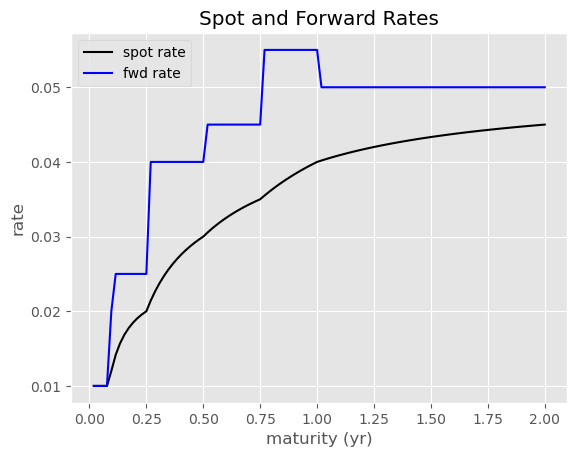

In [57]:
# plot
plt.plot(tweekly, spotRates, color='black', label="spot rate")
plt.plot(tweekly, fwdRates, color='blue', label="fwd rate")
plt.title("Spot and Forward Rates")
plt.legend(loc="upper left")
plt.xlabel('maturity (yr)')
plt.ylabel('rate');

In [58]:
import qflib
print(qflib.__file__)


c:\ProgramData\miniconda3\envs\qfgb\lib\site-packages\qflib\__init__.py


### Homework 8 - Problem 2.

In [65]:
qf.mktClear()


True

In [75]:
# yield curve "USD"
ycMaturities = [1/12, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0]
ycRates      = [0.01, 0.02, 0.03, 0.035, 0.04, 0.0475, 0.0525, 0.06]
qf.ycCreate("USD", ycMaturities, ycRates, 0)

# Create volatility TS
volMaturities = [1/12, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0]
volValues     = [0.25, 0.26, 0.27, 0.28, 0.30, 0.35, 0.40]
volTypeInt = 0
qf.volCreate("VOLTS", volMaturities, volValues, 0)
qf.mktList()

{'YieldCurves': ['USD'], 'Volatilities': ['VOLTS']}

In [80]:
#eurobsmc
mcpars0 = {'URNGTYPE': 'MT19937', 'PATHGENTYPE': 'EULER'}
npaths0 = 100000

res_ts = qf.euroBSMC(
    1,         
    100,       
    1.0,       
    100,       
    "USD",     
    0.04,      
    "VOLTS",   
    mcpars0,
    npaths0
)

In [81]:
res_const = qflib.euroBSMC(
    1,       
    100,     # strike
    1.0,     # timeToExp
    100,     # spot
    "USD",   # discount crv
    0.04,    # div yield
    0.40,    # numeric vol
    mcpars0,
    npaths0
)


In [82]:
#eurobs
euro = qf.euroBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.04, divyield = 0.04, volatility = 0.4)[0]

print("Term-Structure Vol result:", res_ts)
print("Constant Vol result:", res_const)
print('European option using Black-Scholes analytic solution')
print(f'Price={euro:.4f}')

Term-Structure Vol result: {'Mean': 11.376827197937665, 'StdErr': 0.06322598296386915}
Constant Vol result: {'Mean': 15.113429885392643, 'StdErr': 0.08961271940716893}
European option using Black-Scholes analytic solution
Price=15.2304


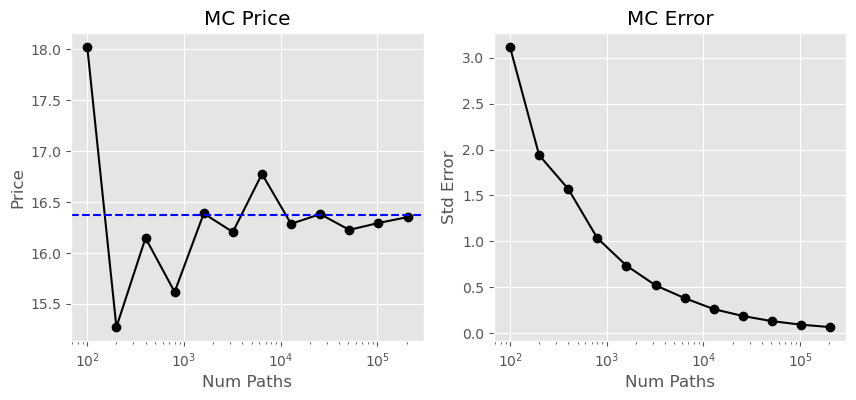

In [83]:
# convergence analysis
npaths = [ 100 * 2 ** i for i in range(12)]

mcprices = []
stderrs = []
for i in range(len(npaths)):
    mcres = qf.euroBSMC(payofftype = 1, strike = 100, timetoexp = 1.0, spot = 100,
                       discountcrv =  yc, divyield = 0.02, volatility = 0.4,
                       mcparams = mcpars0, npaths = npaths[i])
    mcprices.append(mcres["Mean"])
    stderrs.append(mcres["StdErr"])

bsprice = qf.euroBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.04, divyield = 0.02, volatility = 0.4)[0]

# plot prices and errors
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(npaths, mcprices, color='black', marker='o')
plt.axhline(y=bsprice, color='blue', linestyle='--')
plt.xscale('log')
plt.title("MC Price")
plt.xlabel('Num Paths')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.plot(npaths, stderrs, color='black', marker='o')
#plt.axhline(y=bsprice, color='blue', linestyle='--')
plt.xscale('log')
plt.title("MC Error")
plt.xlabel('Num Paths')
plt.ylabel('Std Error');
